In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('airline_satisfaction_combined.csv')
data

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied
129483,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied
129484,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied
129485,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied


In [9]:
def cont_vis_analysis(data,col):

    skewness = data[col].skew()
    print(f'Skewness in {col} is: {skewness}')
    
    fig, axes = plt.subplots(1,2,figsize=(8,3), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions')

    axes[0].set_title('Histogram')
    sns.histplot(data[col], bins = 20, kde = True, ax = axes[0])

    axes[1].set_title('Box Plot')
    sns.boxplot(data[col], ax = axes[1])

Skewness in Age is: -0.0033764472026258253


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


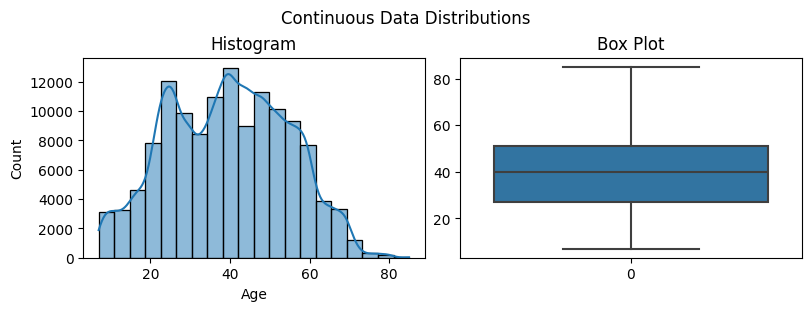

In [11]:
cont_vis_analysis(data,'Age')

Skewness in Flight Distance is: 1.1084329966476683


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


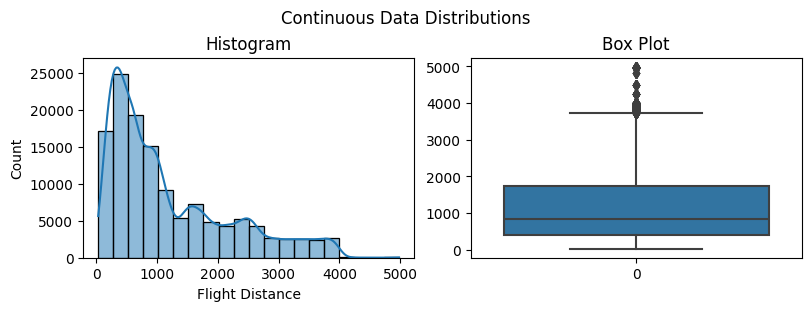

In [13]:
cont_vis_analysis(data,'Flight Distance')

Skewness in Departure Delay in Minutes is: 6.853577955923476


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


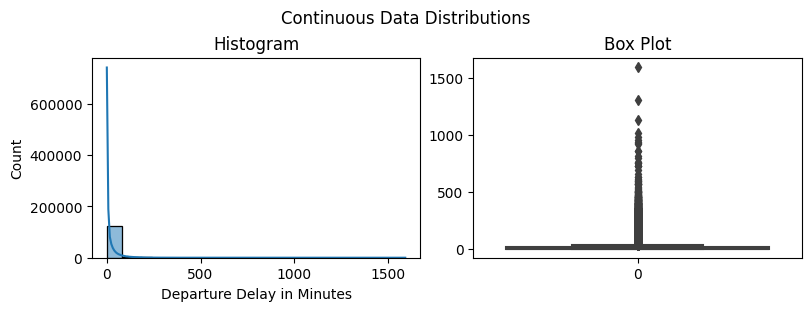

In [15]:
cont_vis_analysis(data,'Departure Delay in Minutes')

Skewness in Arrival Delay in Minutes is: 6.670124610533309


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


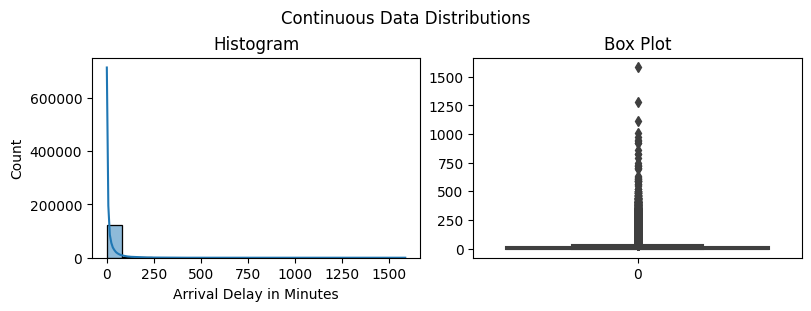

In [17]:
cont_vis_analysis(data,'Arrival Delay in Minutes')

In [26]:
# There are few outliers in "Flight Distance" column.
# And the outliers concentration is more in "Arrival Delay in Minutes" and "Departure Delay in Minutes".
# Before jumping into preprocessing we should treat these outliers, 
# So, that scaling will behave much more predictably.

In [23]:
data_prepros.select_dtypes(include='number').columns

Index(['Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [21]:
data_prepros = data.copy()
data_prepros.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [25]:
data_prepros["Flight Distance (log)"] = np.log1p(data_prepros["Flight Distance"])

In [29]:
def cont_vis_analysis(data_prepros,col):

    skewness = data_prepros[col].skew()
    print(f'Skewness in {col} is: {skewness}')
    
    fig, axes = plt.subplots(1,2,figsize=(8,3), layout = 'constrained')
    fig.suptitle('Continuous Data Distributions')

    axes[0].set_title('Histogram')
    sns.histplot(data_prepros[col], bins = 20, kde = True, ax = axes[0])

    axes[1].set_title('Box Plot')
    sns.boxplot(data_prepros[col], ax = axes[1])

Skewness in Flight Distance (log) is: -0.20531591304491675


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


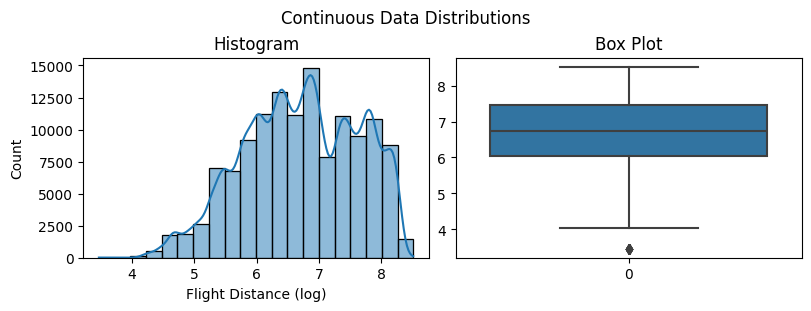

In [31]:
cont_vis_analysis(data_prepros,'Flight Distance (log)')

In [33]:
data_prepros["Departure Delay (log)"] = np.log1p(data_prepros["Departure Delay in Minutes"])
data_prepros["Arrival Delay (log)"] = np.log1p(data_prepros["Arrival Delay in Minutes"])

# This transformation will:
    #--> Compress extreme values
    #--> Reduce skewness
    #--> Make scaling more stable
    #--> Help the model focus on relative differences instead of raw minute counts

Skewness in Departure Delay (log) is: 0.9187641589917925


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


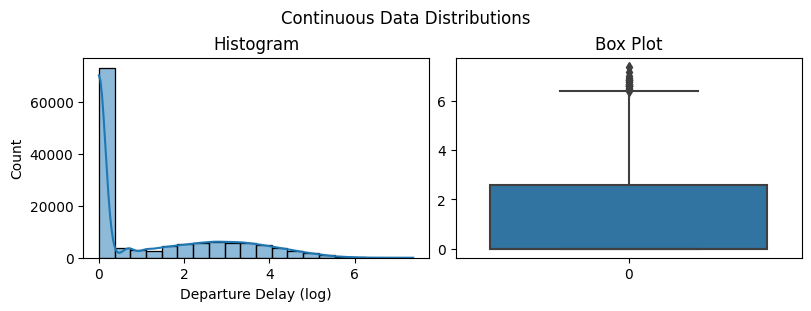

In [35]:
cont_vis_analysis(data_prepros,'Departure Delay (log)')

Skewness in Arrival Delay (log) is: 0.8715593973890786


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


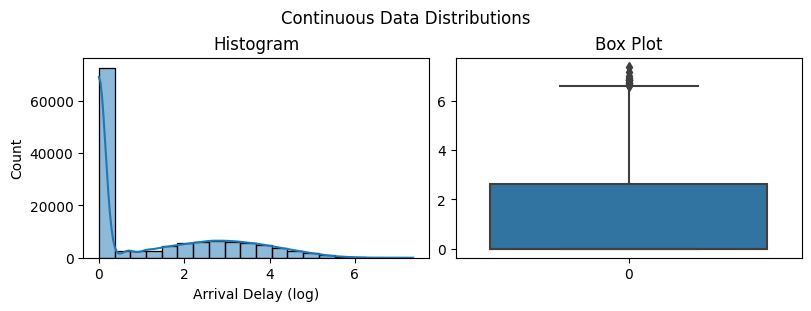

In [37]:
cont_vis_analysis(data_prepros,'Arrival Delay (log)')

# Capping 
- Let's also apply capping and compare both the versions of skewness (skewness when applied log transformation and skewness when applied capping)

# Do not run this code ⚠️

In [115]:
'''
# copy to preserve the original columns
data_prepros['Departure Delay in Minutes (capped)'] = data_prepros['Departure Delay in Minutes']
data_prepros['Arrival Delay in Minutes (capped)'] = data_prepros['Arrival Delay in Minutes']

# defining 95th percentile
dep_cap = data_prepros['Departure Delay in Minutes'].quantile(0.95)
arr_cap = data_prepros['Arrival Delay in Minutes'].quantile(0.95)

# Applying Capping
data_prepros['Departure Delay in Minutes (capped)'] = np.where(data_prepros['Departure Delay in Minutes'] > dep_cap, dep_cap, data_prepros['Departure Delay in Minutes (capped)'])

data_prepros['Arrival Delay in Minutes (capped)'] = np.where(data_prepros['Arrival Delay in Minutes'] >arr_cap, arr_cap, data_prepros['Arrival Delay in Minutes (capped)'])
'''

Skewness in Departure Delay in Minutes (capped) is: 2.0941435120346292


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


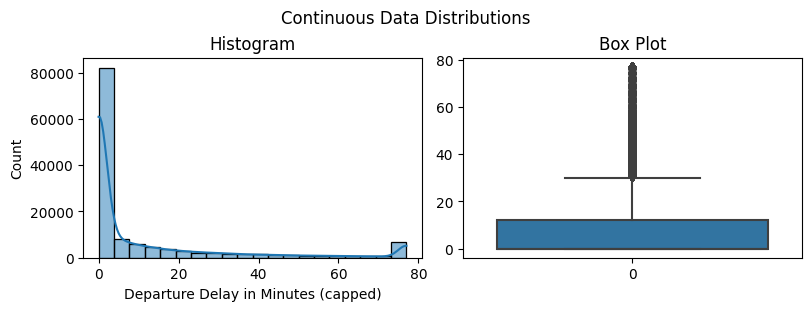

In [120]:
# cont_vis_analysis(data_prepros,'Departure Delay in Minutes (capped)')

Skewness in Arrival Delay in Minutes (capped) is: 2.0673464766539973


C:\Users\rohit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


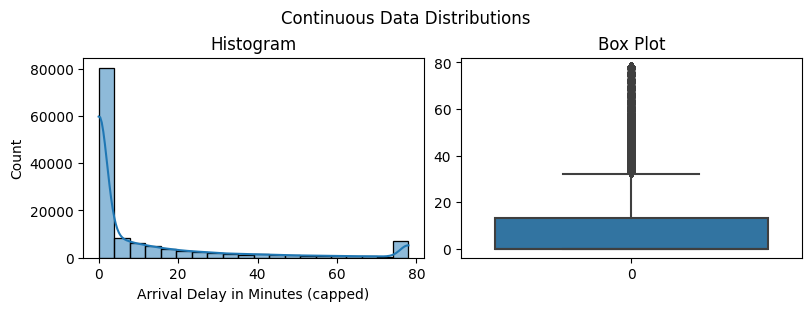

In [122]:
# cont_vis_analysis(data_prepros,'Arrival Delay in Minutes (capped)')

# ⚠️⚠

**What This Tells Us:**
- Log transformation wins here.
- It brought the skew down from a wild 6.6 to below 1, which is amazing.
- Capping helped a bit but didn’t reduce the spread as much, and those extreme values still slightly distort the distribution.

**So, we can drop the columns which we created using capping**

In [131]:
# data_prepros.drop(['Departure Delay in Minutes (capped)','Arrival Delay in Minutes (capped)'], inplace = True, axis = 1)

In [39]:
data_prepros

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Flight Distance (log),Departure Delay (log),Arrival Delay (log)
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,6.133398,3.258097,2.944439
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,5.463832,0.693147,1.945910
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,7.041412,0.000000,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,6.333280,2.484907,2.302585
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,5.370638,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129482,Male,disloyal Customer,34,Business travel,Business,526,3,3,3,1,4,3,4,4,3,2,4,4,5,4,0,0.0,neutral or dissatisfied,6.267201,0.000000,0.000000
129483,Male,Loyal Customer,23,Business travel,Business,646,4,4,4,4,4,4,4,4,4,5,5,5,5,4,0,0.0,satisfied,6.472346,0.000000,0.000000
129484,Female,Loyal Customer,17,Personal Travel,Eco,828,2,5,1,5,2,1,2,2,4,3,4,5,4,2,0,0.0,neutral or dissatisfied,6.720220,0.000000,0.000000
129485,Male,Loyal Customer,14,Business travel,Business,1127,3,3,3,3,4,4,4,4,3,2,5,4,5,4,0,0.0,satisfied,7.028201,0.000000,0.000000


In [41]:
data_prepros.drop(['Departure Delay in Minutes','Arrival Delay in Minutes'], inplace = True, axis = 1)

## Golden Rule: split first ✅, preprocess after
- **Because**
    - If we scale or encode the entire dataset before splitting, the model "sees" information from the test set during training, which leads to:

        - Data leakage
        - Over-optimistic validation results
        - Poor generalization on truly unseen data

In [43]:
data_prepros.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Flight Distance (log),Departure Delay (log),Arrival Delay (log)
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,neutral or dissatisfied,6.133398,3.258097,2.944439
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,neutral or dissatisfied,5.463832,0.693147,1.945910
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,satisfied,7.041412,0.000000,0.000000
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,neutral or dissatisfied,6.333280,2.484907,2.302585
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,satisfied,5.370638,0.000000,0.000000


In [45]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X = data_prepros.drop('satisfaction', axis = 1)
y = data_prepros['satisfaction']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)
# stratify = y --> preserves that ratio(57:43) in both training and test sets

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((103589, 23), (25898, 23), (103589,), (25898,))

In [49]:
ratings_cols = ['Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking',
                'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
                'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling',
                'Checkin service', 'Inflight service', 'Cleanliness']

# X_train[ratings_cols] = data_prepros.loc[X_train.index, ratings_cols]
# X_test[ratings_cols] = data_prepros.loc[X_test.index, ratings_cols]

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [53]:
# Step-1: Splitting numerical and categorical columns

# Updated numerical columns without rating columns
num_cols = [col for col in X_train.select_dtypes(include='number').columns if col not in ratings_cols]
cat_cols = X_train.select_dtypes(include = 'object').columns

# Scaling Numerical Columns
X_train_num_scaled = pd.DataFrame(scaler.fit_transform(X_train[num_cols]),
                                 columns = num_cols, index = X_train.index)

X_test_num_scaled = pd.DataFrame(scaler.transform(X_test[num_cols]),
                                columns = num_cols, index = X_test.index)

# Encoding Categorical Columns
X_train_cat_encoded = pd.get_dummies(X_train[cat_cols], drop_first=True)
X_test_cat_encoded = pd.get_dummies(X_test[cat_cols], drop_first=True)

# Aligning both datasets to ensure columns match
X_train_cat_encoded, X_test_cat_encoded = X_train_cat_encoded.align(X_test_cat_encoded, join='left', axis=1, fill_value = 0)

# Step-4: 
# Re-attach the unscaled ratings columns
X_train_ratings = X_train[ratings_cols]
X_test_ratings = X_test[ratings_cols]

# Final concatenation: scaled numericals + unscaled ratings + encoded categoricals

X_train_final = pd.concat([X_train_num_scaled, X_train_ratings, X_train_cat_encoded], axis = 1)
X_test_final = pd.concat([X_test_num_scaled, X_test_ratings, X_test_cat_encoded], axis = 1)

In [55]:
X_train_final

,Age,Flight Distance,Flight Distance (log),Departure Delay (log),Arrival Delay (log),Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
48592,-1.087401,-0.368053,0.008233,-0.761486,-0.775461,2,3,3,5,2,3,5,2,3,5,2,5,5,5,True,True,False,True,False
123293,-0.159977,1.067202,1.109235,-0.761486,0.799011,3,3,3,3,3,5,5,4,4,4,4,5,4,3,True,False,False,False,False
52701,0.105001,-0.995915,-1.554199,-0.761486,-0.775461,4,4,4,4,5,4,5,5,1,4,5,5,4,5,False,False,False,True,False
18350,-1.286134,-0.199554,0.211230,-0.761486,-0.775461,2,2,2,3,1,2,1,1,4,3,5,4,5,1,True,True,False,True,False
108503,0.105001,-0.294836,0.101104,0.993608,1.063443,3,5,3,3,3,4,4,4,4,4,4,5,4,4,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52926,-1.021156,-0.890602,-1.087330,1.365770,-0.101087,5,0,5,3,4,5,4,4,2,2,3,4,4,4,False,True,False,True,False
90338,-1.219890,-1.014971,-1.665031,-0.761486,-0.349978,4,5,4,5,4,4,3,4,4,5,4,2,1,4,True,True,False,True,False
87959,-0.822422,-0.645877,-0.440183,-0.761486,-0.775461,4,4,4,3,2,4,1,2,5,3,5,4,4,2,True,True,False,False,False
48781,-0.027488,1.599781,1.340407,0.443949,1.031957,3,4,4,4,4,3,4,3,3,3,3,2,3,1,False,False,False,False,False


In [39]:
X_test_final

,Age,Flight Distance,Flight Distance (log),Departure Delay (log),Arrival Delay (log),Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Gender_Male,Customer Type_disloyal Customer,Type of Travel_Personal Travel,Class_Eco,Class_Eco Plus
99927,0.502468,-0.696026,-0.545139,-0.761486,-0.775461,1,4,1,3,2,1,2,2,4,4,4,5,5,2,True,False,True,True,False
9123,-0.822422,-0.068164,0.346905,1.385438,0.886852,4,4,4,3,2,4,2,2,3,2,4,2,4,2,True,True,False,False,False
8591,-1.021156,0.287892,0.647316,1.983277,1.777432,2,5,3,5,2,2,1,2,1,4,1,3,2,2,False,False,False,False,True
50823,0.303735,0.641941,0.881506,-0.761486,-0.775461,3,4,3,3,1,3,1,1,4,2,3,4,4,1,True,False,True,True,False
50389,0.038757,1.401193,1.259814,-0.761486,-0.775461,1,3,1,3,1,3,3,1,1,2,2,3,3,3,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60558,0.303735,1.678013,1.370593,-0.761486,-0.775461,2,2,2,2,5,4,5,5,5,5,5,3,5,3,False,False,False,False,False
94944,-1.816091,-0.753195,-0.678544,1.029016,1.747962,2,4,2,2,1,2,1,1,3,4,4,5,5,1,True,False,True,True,False
49199,0.436224,-0.243684,0.161600,0.097283,0.926468,1,1,1,1,3,1,5,3,1,4,1,2,2,3,True,False,True,True,False
62409,0.369979,0.374147,0.709162,1.094284,-0.349978,2,4,2,4,2,5,4,2,2,2,2,4,2,3,False,False,True,True,False


In [57]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train_final = pd.Series(le.fit_transform(y_train), index = y_train.index, name = 'satisfaction_encoded')
y_test_final = pd.Series(le.fit_transform(y_test), index = y_test.index, name = 'satisfaction_encoded')

In [59]:
y_train_final

48592     0
123293    1
52701     1
18350     0
108503    1
         ..
52926     1
90338     1
87959     1
48781     0
2573      0
Name: satisfaction_encoded, Length: 103589, dtype: int32

In [61]:
y_test_final

99927    0
9123     0
8591     0
50823    0
50389    0
        ..
60558    1
94944    0
49199    0
62409    0
31455    0
Name: satisfaction_encoded, Length: 25898, dtype: int32

# Model Training
### Logistic Regression

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# training the model
log_model = LogisticRegression(max_iter = 1000, random_state = 42)
log_model.fit(X_train_final, y_train_final)

# random state = 42 --> gives the same results every time we train the model, which is crucial for debugging and comparing experiments.

# Predictions
y_pred_train = log_model.predict(X_train_final)
y_pred_test = log_model.predict(X_test_final)

In [65]:
# Evaluation
# On train data
print('Train data evaluation:')
print(confusion_matrix(y_train_final, y_pred_train))
print(classification_report(y_train_final, y_pred_train))

print('-'*50)

# On Test data
print('Test data evaluation:')
print(confusion_matrix(y_test_final, y_pred_test))
print(classification_report(y_test_final, y_pred_test))

print('-'*50)

# ROC-AUC
y_proba_test = log_model.predict_proba(X_test_final)[:,1]
print('ROC-AUC Score:', roc_auc_score(y_test_final, y_proba_test))

Train data evaluation:
[[52967  5613]
 [ 7370 37639]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     58580
           1       0.87      0.84      0.85     45009

    accuracy                           0.87    103589
   macro avg       0.87      0.87      0.87    103589
weighted avg       0.87      0.87      0.87    103589

--------------------------------------------------
Test data evaluation:
[[13225  1420]
 [ 1821  9432]]
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     14645
           1       0.87      0.84      0.85     11253

    accuracy                           0.87     25898
   macro avg       0.87      0.87      0.87     25898
weighted avg       0.87      0.87      0.87     25898

--------------------------------------------------
ROC-AUC Score: 0.9284119007512035


In [67]:
y_proba_test = log_model.predict_proba(X_test_final)[:, 1]
y_proba_test

array([0.03243615, 0.15913802, 0.03858743, ..., 0.00278421, 0.07079667,
       0.42853961])

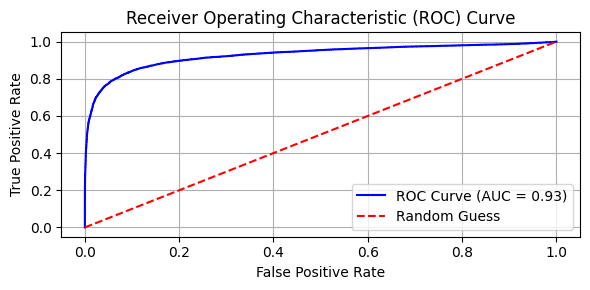

In [69]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Step 1: Get FPR, TPR, and thresholds
fpr, tpr, thresholds = roc_curve(y_test_final, y_proba_test)

# Step 2: Compute AUC
roc_auc = auc(fpr, tpr)

# Step 3: Plot
plt.figure(figsize=(6, 3))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()

## Decision Tree Classifier

In [71]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Initialize the model
tree_model = DecisionTreeClassifier(random_state=42, max_depth=10)  # You can tune depth later
tree_model.fit(X_train_final, y_train_final)

# Predictions
y_pred_train = tree_model.predict(X_train_final)
y_pred_test = tree_model.predict(X_test_final)

# Evaluation
print("Train Evaluation")
print(confusion_matrix(y_train_final, y_pred_train))
print(classification_report(y_train_final, y_pred_train))

print("Test Evaluation")
print(confusion_matrix(y_test_final, y_pred_test))
print(classification_report(y_test_final, y_pred_test))

# ROC-AUC
y_proba_test = tree_model.predict_proba(X_test_final)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test_final, y_proba_test))


Train Evaluation
[[56747  1833]
 [ 3556 41453]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     58580
           1       0.96      0.92      0.94     45009

    accuracy                           0.95    103589
   macro avg       0.95      0.94      0.95    103589
weighted avg       0.95      0.95      0.95    103589

Test Evaluation
[[14128   517]
 [  961 10292]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     14645
           1       0.95      0.91      0.93     11253

    accuracy                           0.94     25898
   macro avg       0.94      0.94      0.94     25898
weighted avg       0.94      0.94      0.94     25898

ROC-AUC Score: 0.9845405786407339


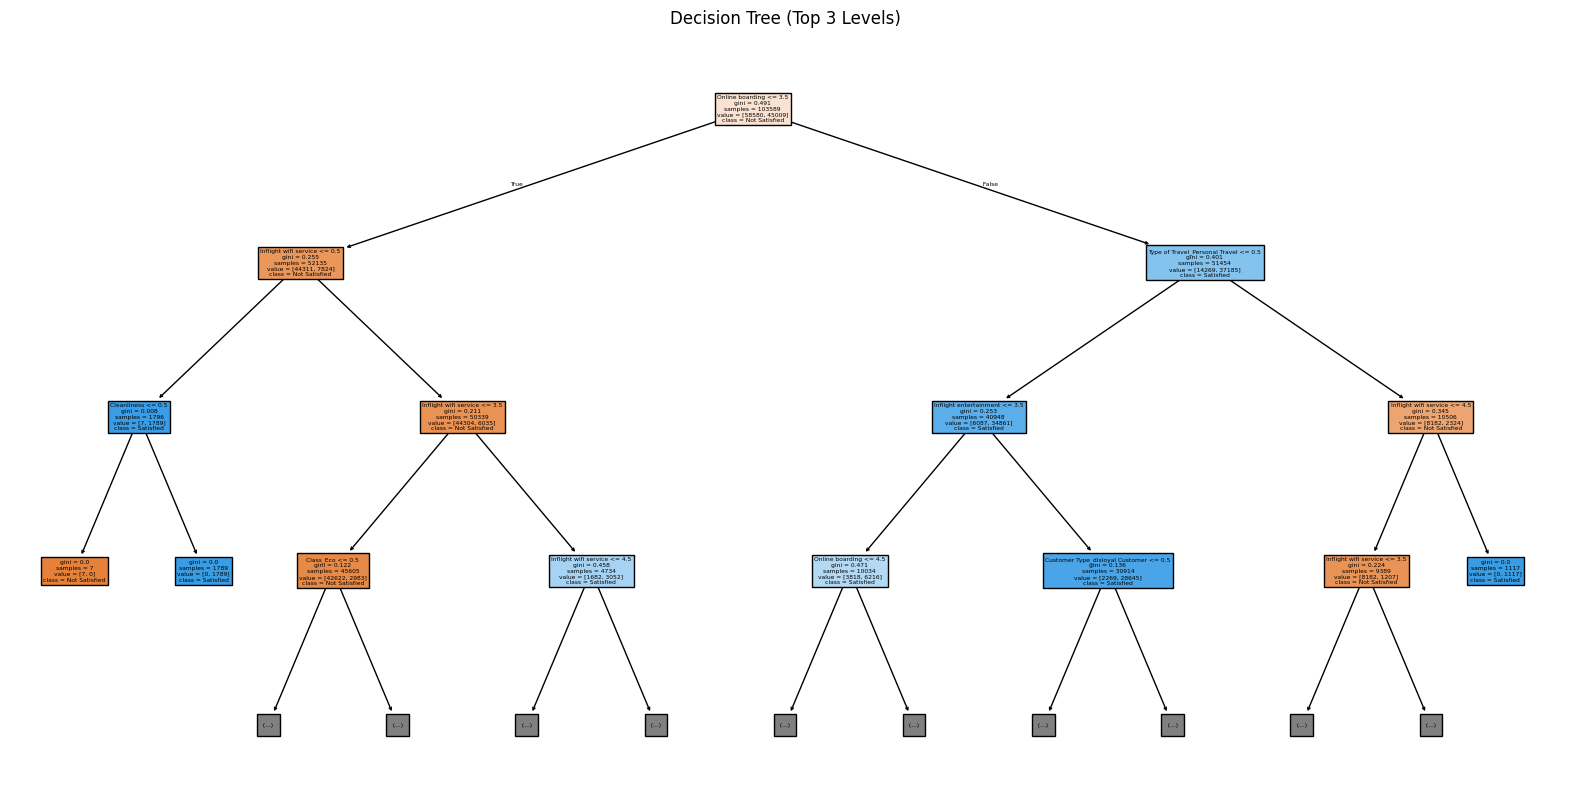

In [73]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(tree_model, filled=True, feature_names=X_train_final.columns, class_names=['Not Satisfied', 'Satisfied'], max_depth=3)
plt.title("Decision Tree (Top 3 Levels)")
plt.show()


## Decision Tree Classifier with GridSearch CV

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}   # GridSearch will try every combination (so 4×3×3×2 = 72 combos total).

# Running GridSearch CV
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,     # Specifies 5-fold cross-validation. training data will be split into 5 chunks—4 for training, 1 for validation—and this process repeats 5 times, rotating the validation fold.
    n_jobs=-1,   # Uses all available CPU cores to parallelize the search, speeding things up considerably.
    verbose=1
)

grid_search.fit(X_train_final, y_train_final)

# Evaluating results
print("Best Parameters:", grid_search.best_params_)
best_tree = grid_search.best_estimator_

# Train data evaluation
y_pred_train = best_tree.predict(X_train_final)
y_proba_train = best_tree.predict_proba(X_train_final)[:, 1]

# Predict and evaluate
y_pred_test = best_tree.predict(X_test_final)
y_proba_test = best_tree.predict_proba(X_test_final)[:, 1]

print('Train Data Evaluation:')
print("Classification Report:\n", classification_report(y_train_final, y_pred_train))
print("ROC-AUC Score:", roc_auc_score(y_train_final, y_proba_train))
print('-'*40)
print('Test Data Evaluation:')
print("Classification Report:\n", classification_report(y_test_final, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test_final, y_proba_test))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Train Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.96     58580
           1       0.96      0.92      0.94     45009

    accuracy                           0.95    103589
   macro avg       0.95      0.95      0.95    103589
weighted avg       0.95      0.95      0.95    103589

ROC-AUC Score: 0.990680772270871
----------------------------------------
Test Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.97      0.95     14645
           1       0.96      0.92      0.94     11253

    accuracy                           0.95     25898
   macro avg       0.95      0.94      0.95     25898
weighted avg       0.95      0.95      0.95     25898

ROC-AUC Sc

In [74]:
print(best_tree)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       min_samples_split=10, random_state=42)


In [71]:
# train vs test ROC curves side by side to visually compare their performance:
# and to check if there is any issue of overfitting

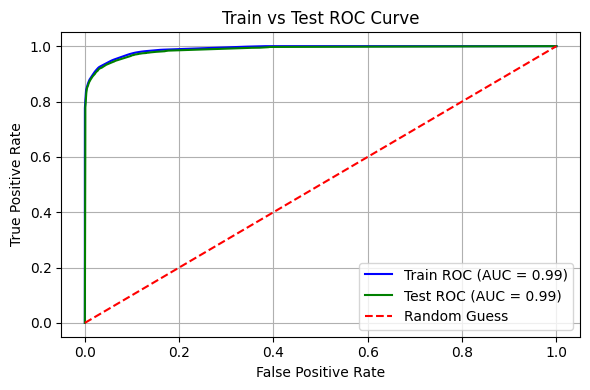

In [77]:
# Train probabilities and ROC
y_proba_train = best_tree.predict_proba(X_train_final)[:, 1]
fpr_train, tpr_train, _ = roc_curve(y_train_final, y_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Test probabilities and ROC
y_proba_test = best_tree.predict_proba(X_test_final)[:, 1]
fpr_test, tpr_test, _ = roc_curve(y_test_final, y_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(fpr_train, tpr_train, label=f"Train ROC (AUC = {roc_auc_train:.2f})", color='blue')
plt.plot(fpr_test, tpr_test, label=f"Test ROC (AUC = {roc_auc_test:.2f})", color='green')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train vs Test ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

- train and test curves are near the top-left corner, with AUC = 0.99 for both—meaning model is doing a superb job of distinguishing between the two classes without overfitting.

- If overfitting were a concern, we'd typically see the train curve much higher than the test curve. But here, the fact that both are nearly identical strongly suggests that your model generalizes well to unseen data.

### Random Forest Classifier with hyper parameter tuning

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Parameter Grid
param_grid = {
    'n_estimators' : [100,200],
    'max_depth' : [10, 20, None],
    'min_samples_split' : [2, 3, 10],
    'min_samples_leaf' : [1, 2, 4],
    'max_features' : ['sort', 'log2']
}

# Setting Up and Running GridSearchCV

rf = RandomForestClassifier(random_state = 42)

grid_search_rf = GridSearchCV(
    estimator = rf,
    param_grid = param_grid,
    scoring = 'roc_auc',
    cv = 5,
    n_jobs = -1,
    verbose = 1
)

grid_search_rf.fit(X_train_final, y_train_final)

# Evaluating the best model
best_rf = grid_search_rf.best_estimator_
print('Best Parameters:', grid_search_rf.best_params_)

y_pred_test = best_rf.predict(X_test_final)
y_proba_test = best_rf.predict_proba(X_test_final)[:, 1]

from sklearn.metrics import classification_report, roc_auc_score
print("Classification Report:\n", classification_report(y_test_final, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test_final, y_proba_test))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
270 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
  File "C:\Users\rohit\anaconda3\Lib\site-packages\sklearn\base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\rohit\anaconda3\Lib\site-package

Best Parameters: {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 200}
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.94      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

ROC-AUC Score: 0.9939462567957674


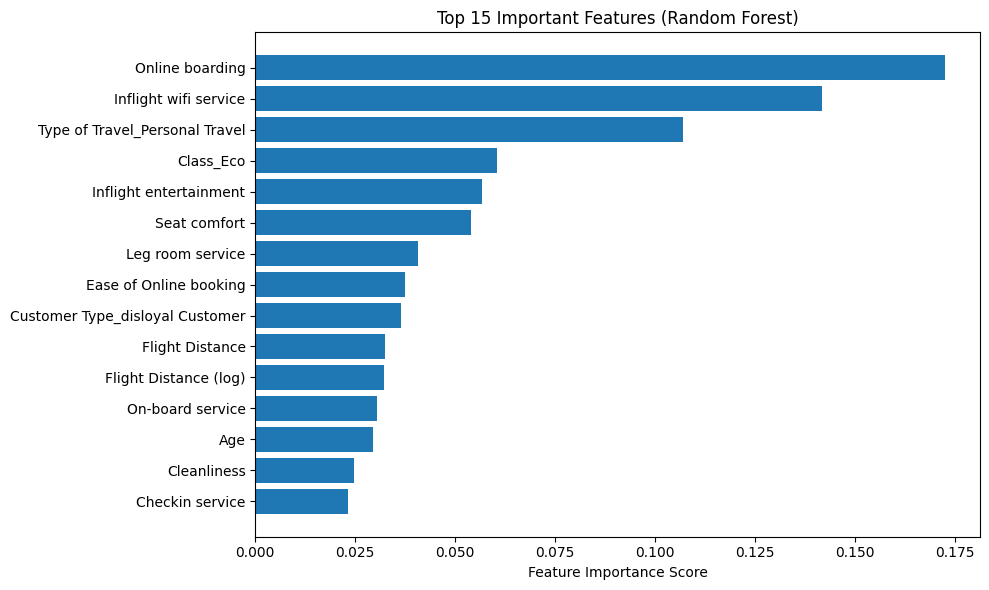

In [89]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X_train_final.columns

# Create a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:15][::-1], feat_imp_df['Importance'][:15][::-1])
plt.xlabel("Feature Importance Score")
plt.title("Top 15 Important Features (Random Forest)")
plt.tight_layout()
plt.show()


In [93]:
feat_imp_df.head()

,Feature,Importance
10,Online boarding,0.172601
5,Inflight wifi service,0.141610
21,Type of Travel_Personal Travel,0.107037
22,Class_Eco,0.060415
12,Inflight entertainment,0.056610


The Random Forest clearly leans heavily on key service-related features—"Online boarding" and "Inflight wifi service" alone contribute nearly 30% of the model’s decision-making power.

In [59]:
# from sklearn.svm import SVC
# from sklearn.metrics import classification_report, roc_auc_score

# # Initialize a basic SVM model
# svm_model = SVC(kernel='rbf', C=1, gamma='scale', probability=True, random_state=42)

# # Fit on training data
# svm_model.fit(X_train_final, y_train_final)

# # Predict on test data
# y_pred_test = svm_model.predict(X_test_final)
# y_proba_test = svm_model.predict_proba(X_test_final)[:, 1]

# # Evaluation
# print("Classification Report:\n", classification_report(y_test_final, y_pred_test))
# print("ROC-AUC Score:", roc_auc_score(y_test_final, y_proba_test))


### XG Boost Classifier

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Initialize the model
xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

# Fit the model
xgb_model.fit(X_train_final, y_train_final)

# Predict and evaluate on train data
y_pred_train = xgb_model.predict(X_train_final)
y_train_proba = xgb_model.predict_proba(X_train_final)[:, 1]

# Predict and evaluate on test data
y_pred_test = xgb_model.predict(X_test_final)
y_test_proba = xgb_model.predict_proba(X_test_final)[:, 1]

print('Train Data Evaluation:')
print("Classification Report:\n", classification_report(y_train_final, y_pred_train))
print("ROC-AUC Score:", roc_auc_score(y_train_final, y_train_proba))
print('-'*40)
print('Test Data Evaluation:')
print("Classification Report:\n", classification_report(y_test_final, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test_final, y_test_proba))


C:\Users\rohit\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [16:25:40] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Train Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     58580
           1       0.97      0.94      0.96     45009

    accuracy                           0.96    103589
   macro avg       0.96      0.96      0.96    103589
weighted avg       0.96      0.96      0.96    103589

ROC-AUC Score: 0.9951351459915521
----------------------------------------
Test Data Evaluation:
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96     14645
           1       0.97      0.94      0.95     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

ROC-AUC Score: 0.9941322669024917


### Stacking Classifier

In [74]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Base learners
estimators = [
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(**grid_search_rf.best_params_, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# Meta-model (can be simpler, like LogisticRegression)
stack_model = StackingClassifier(
    estimators=estimators,
    final_estimator=LogisticRegression(),
    cv=5,
    n_jobs=-1
)

from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

stack_model.fit(X_train_final, y_train_final)

# Train Predictions
y_pred_train = stack_model.predict(X_train_final)
y_proba_train = stack_model.predict_proba(X_train_final)[:, 1]

print("Train Data Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_train_final, y_pred_train))
print("Classification Report:\n", classification_report(y_train_final, y_pred_train))
print("ROC-AUC Score:", roc_auc_score(y_train_final, y_proba_train))
print("-" * 50)

# Test Predictions
y_pred_test = stack_model.predict(X_test_final)
y_proba_test = stack_model.predict_proba(X_test_final)[:, 1]

print("Test Data Evaluation:")
print("Confusion Matrix:\n", confusion_matrix(y_test_final, y_pred_test))
print("Classification Report:\n", classification_report(y_test_final, y_pred_test))
print("ROC-AUC Score:", roc_auc_score(y_test_final, y_proba_test))


Train Data Evaluation:
Confusion Matrix:
 [[58424   156]
 [  328 44681]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00     58580
           1       1.00      0.99      0.99     45009

    accuracy                           1.00    103589
   macro avg       1.00      1.00      1.00    103589
weighted avg       1.00      1.00      1.00    103589

ROC-AUC Score: 0.9999370874279299
--------------------------------------------------
Test Data Evaluation:
Confusion Matrix:
 [[14304   341]
 [  600 10653]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97     14645
           1       0.97      0.95      0.96     11253

    accuracy                           0.96     25898
   macro avg       0.96      0.96      0.96     25898
weighted avg       0.96      0.96      0.96     25898

ROC-AUC Score: 0.9946461831945153


### Final Model Performance Summary

| Model                        | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC-AUC  |
|-----------------------------|----------|----------------------|------------------|--------------------|----------|
| Logistic Regression         | 0.87     | 0.87                 | 0.84             | 0.85               | 0.928    |
| Decision Tree (tuned)       | 0.95     | 0.96                 | 0.92             | 0.94               | 0.987    |
| Random Forest (tuned)       | 0.96     | 0.97                 | 0.94             | 0.96               | 0.994    |
| XGBoost                     | 0.96     | 0.97                 | 0.94             | 0.95               | 0.994    |
| **Stacking Classifier**     | **0.96** | **0.97**             | **0.95**         | **0.96**           | **0.995** |

### Notes:

- **Class 1 = Satisfied customers** (positive class)
- The Stacking Classifier slightly outperforms the others in ROC-AUC and balances precision/recall best.
- Logistic Regression offers transparency, while XGBoost and RF provide power and non-linearity handling.
- We can enhance this table further with training performance, execution time, or number of features used—if helpful for stakeholders.

